<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# PROYECTO CON PYTHON

Explorar los datos sobre viajes en taxi para identificar los barrios y compañías con mayor actividad, evaluar la distribución de los viajes y analizar cómo las condiciones climáticas pueden influir en su duración.

## Análisis exploratorio

In [1]:
#Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_projects = pd.read_csv('/datasets/project_sql_result_01.csv')#cargar los datos

In [3]:
df_project_04 = pd.read_csv('/datasets/project_sql_result_04.csv')#cargar los datos

In [4]:
df_project_07 = pd.read_csv('/datasets/project_sql_result_07.csv')#cargar los datos

#### Estudiar los datos que contienen los dataframes

In [5]:
df_projects.info() #información del dataframe
df_projects.isna().sum() #valores ausentes
df_projects.duplicated().sum() #valores duplicados
print(df_projects.head(10))
df_projects.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


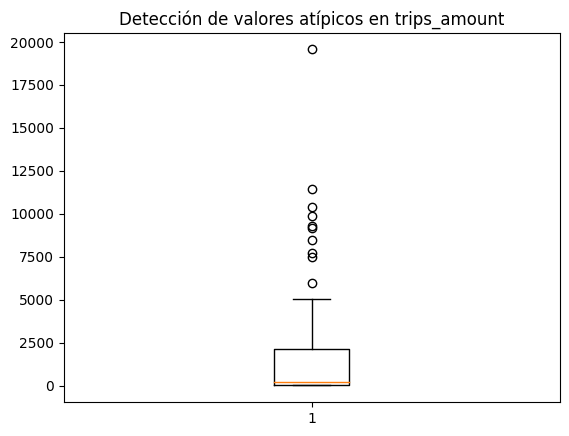

In [6]:
plt.boxplot(df_projects['trips_amount'])
plt.title('Detección de valores atípicos en trips_amount') #VALORES ATÍPICOS
plt.show()

In [7]:
df_project_04.info()
df_project_04.isna().sum() #valores ausentes
df_project_04.duplicated().sum() #revisar datos duplicados
print(df_project_04.head(10))
df_project_04.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


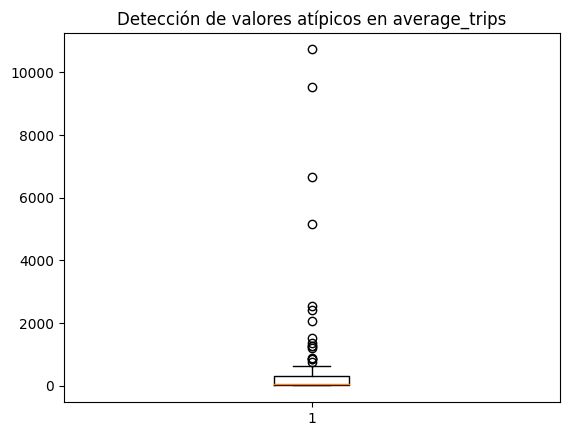

In [8]:
plt.boxplot(df_project_04['average_trips'])
plt.title('Detección de valores atípicos en average_trips') #Valores atípicos
plt.show()


In [9]:
Q1 = df_project_04['average_trips'].quantile(0.25)
Q3 = df_project_04['average_trips'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('Límite inferior:', lower_limit)
print('Límite superior:', upper_limit)
print('Mínimo real:', df_project_04['average_trips'].min())
print('Máximo real:', df_project_04['average_trips'].max())

Límite inferior: -412.6208333333334
Límite superior: 725.7458333333334
Mínimo real: 1.8
Máximo real: 10727.466666666667


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de leer los datos y de hacer una revisión inicial que me parece bastante completa
</div>

#### 10 principales barrios

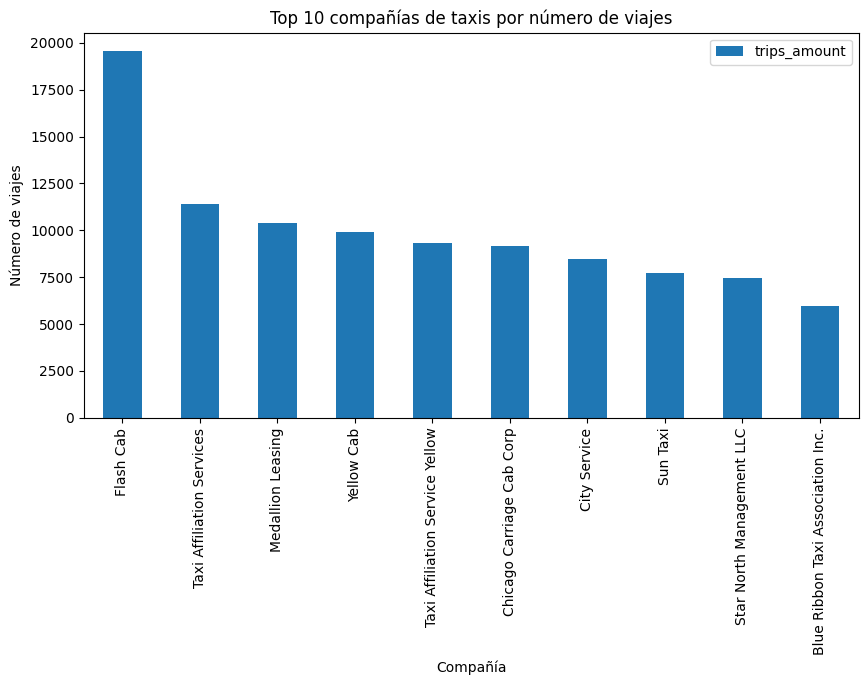

In [10]:
#Los barrios principales con número de viajes
df_projects.head(10).plot(
    x='company_name',
    y='trips_amount',
    kind='bar',
    figsize=(10,5),

    title='Top 10 compañías de taxis por número de viajes')
plt.ylabel('Número de viajes')
plt.xlabel('Compañía')
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar la compañía que tiene más viajes agendados gracias a que limitaste el número de elementos que se muestran
</div>

#### 10 principales barrios finalización

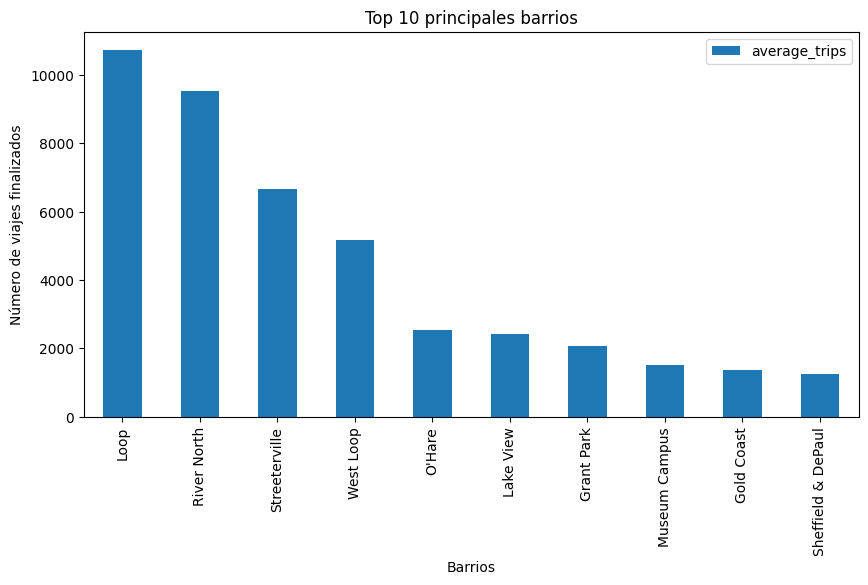

In [11]:
#Finalización de viajes
df_project_04.head(10).plot(
    x='dropoff_location_name',
    y='average_trips',
    kind='bar',
    figsize=(10,5),

    title='Top 10 principales barrios')
plt.ylabel('Número de viajes finalizados')
plt.xlabel('Barrios')
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

## Prueba de Hipótesis

In [12]:
# Verificar categorías del clima
df_project_07['weather_conditions'].value_counts()

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [13]:
# Dividir los viajes 
rainy = df_project_07[df_project_07['weather_conditions'] == 'Bad']['duration_seconds']
dry = df_project_07[df_project_07['weather_conditions'] == 'Good']['duration_seconds']

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>


La manera de separar la información de ambos días es correcta
</div>

In [14]:
# Prueba t para muestras independientes
t_stat, p_value = stats.ttest_ind(rainy, dry, equal_var=False)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.5f}')

Estadístico t: 7.186
Valor p: 0.00000


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

Planteamiento de hipótesis

Hipótesis nula (H₀): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O’Hare no cambia los sábados lluviosos (la media de duración es igual para días lluviosos y no lluviosos).

Hipótesis alternativa (H₁): La duración promedio de los viajes sí cambia los sábados lluviosos (la media de duración difiere entre ambos grupos).

## CONCLUSIONES

En el gráfico de las diez compañías con mayor número de viajes, destaca Flash Cab, con casi 20,000 viajes finalizados, consolidándose como la empresa líder del sector. En contraste, las compañías que le siguen —desde Taxi Affiliation Services hasta Blue Ribbon Taxi Association Inc.— presentan un volumen de viajes significativamente menor, ubicándose en un rango aproximado entre 12,000 y 5,000 viajes finalizados.

En el gráfico de los diez barrios con mayor número de viajes, Loop ocupa el primer lugar, mientras que Sheffield & DePaul se encuentra en la última posición. Loop destaca como el barrio más popular, con más de 10,000 viajes finalizados, lo que podría indicar que es una de las zonas más seguras y con mayor actividad. En contraste, Sheffield & DePaul registra menos de 2,000 viajes finalizados, lo que sugiere una menor demanda o posibles percepciones de inseguridad en la zona.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
- El proyecto es directo y conciso
    
</div>
